Import des bibliothèques

In [3]:
#https://ledatascientist.com/
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print("Importé")

Importé


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Connexion avec le Google Drive

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Intégration du fichier voulu dans le DataFrame : "df"

In [302]:
df=pd.read_csv('/content/gdrive/My Drive/Python/Data/datasets_723010_1257097_fatal-police-shootings-data.csv')
df = df.fillna(0)

In [324]:
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,0.0,M,0,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,0,Beach Park,IL,False,attack,Not fleeing,False


Analyse du DATASET :

Concernant les types de données, on a des "objet" en majorité, une variable "bool" et un float.
Ce DATASET dispose de colonnes indiquant des noms, des manières de mourrir, quel arme cette personne avait, son sexe, la ville etc ...
On en déduit très simplement, en regardant en plus le nom du fichier, que ce fichier répertorie les informations des personnes décédées lors d'intervention de police.

Il y a 14 colonnes différentes ce qui nous laisse beaucoup de choix et d'idées à exploiter.


En voyant ces différentes colonnes et son contenu, on peut penser à plusieurs graphiques : 
*   Nombres de morts par états
*   Race les plus touchés dans un état
*   Armes les plus utilisés
*   Tendance de l'age des morts
*   Nombre de morts en fonction des mois
*   Nombre de femmes tuées comparé au nombre d'hommes tués et ce, en prennant compte des troubles mentaux



Graphiques :

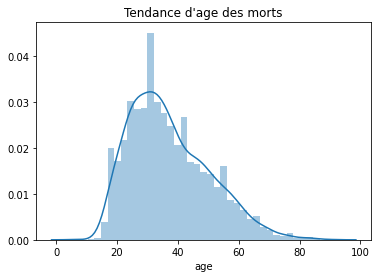

In [314]:
df1 = df [ df ["age"] > 0]
x= df1["age"]
e = sns.distplot(x)
e = plt.title("Tendance d'age des morts")

Ce graphique met en évidence la tendance de l'age  des personnes mourant lors des interventions de police : très peu de personnes en dessous  de 18 ans, une grande masse de gens vers les 30 ans et tout de même quelques personnes agées.

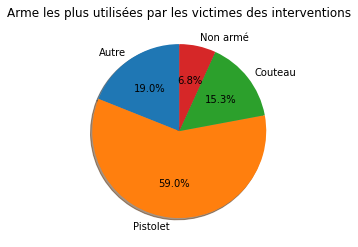

In [330]:
#Cette première partie de code devrait avoir sa méthode qui simplifie cette import afin d'automatiser à 100% les infos. En attendant, cette manière de faire fonctionne aussi
armed_gun = np.sum(df.armed=="gun")
armed_knife = np.sum(df.armed=="knife")
armed_unarmed = np.sum(df.armed=="unarmed")
armed_others = sum(1 for _ in df.armed) - np.sum(df.armed==0)
armed_others = armed_others - armed_knife - armed_gun - armed_unarmed

sizes = [armed_others, armed_gun, armed_knife, armed_unarmed]
labels = 'Autre', 'Pistolet', 'Couteau', 'Non armé'
x = plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
x =plt.title("Arme les plus utilisées par les victimes des interventions")

Ce diagramme circulaire met en évidence les armes qui ont été utilisées par la victime de l'intervention. L'on peut donc voir que le pistolet est l'arme la plus utilisée par les victimes des interventions policières.

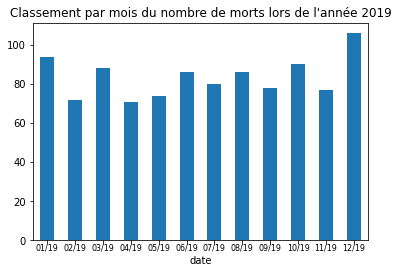

In [290]:
df2 = df.date [ df["date"].dt.year == 2019]
plt.title("Classement par mois du nombre de morts lors de l'année 2019")
#plt.xticks(rotation = 'vertical')
axes = plt.gca()

x = df2.groupby(df2.dt.month).count().plot(kind="bar")
x = axes.xaxis.set_ticklabels(["01/19","02/19","03/19","04/19","05/19","06/19","07/19","08/19","09/19","10/19","11/19","12/19"], 
                          rotation = 0, color = 'black', fontsize = 8, verticalalignment = 'center')

Diagramme visant à obtenir un aperçu sur les periodes avec le plus de morts. On constate donc que les interventions en Décembre sont les plus meurtrières, suivi par Janvier.

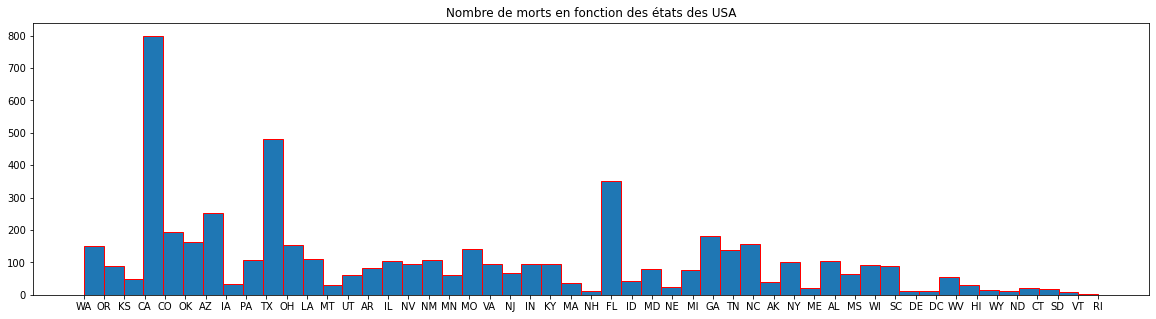

In [319]:
plt.figure(1, figsize=(20, 5))
x = plt.hist(df.state,edgecolor = 'red', bins=51)
x = plt.title("Nombre de morts en fonction des états des USA")

Ce grahique nous montre le nombre de mort en fonction des états. On peut ainsi voir que certains états ont un nombre de mort par intervention de police extremement élevé comme la Californie (CA), suivie par le  Texas (TX) et par la Floride (FL).

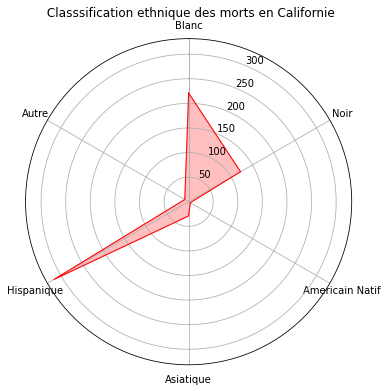

In [320]:
df_CA = df [ df["state"] == "CA"]
race_W = np.sum(df_CA.race=="W")
race_B = np.sum(df_CA.race=="B")
race_H = np.sum(df_CA.race=="H")
race_A = np.sum(df_CA.race=="A")
race_N = np.sum(df_CA.race=="N")
race_O = np.sum(df_CA.race=="O")
#print("White : {} \nBlack : {} \nHispannic : {} \nAsian : {} \nNative : {} \nOther : {}".format(race_W, race_B, race_H, race_A, race_N, race_O))

labels = ['Blanc', 'Noir', 'Americain Natif', 'Asiatique', 'Hispanique', 'Autre']
values = race_W, race_B, race_N, race_A,  race_H , race_O
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
values += values[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.plot(angles, values, color='red', linewidth=1)
ax.fill(angles, values, color='red', alpha=0.25)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
plt.title(" Classsification ethnique des morts en Californie")
x = ax.set_thetagrids(np.degrees(angles), labels)


Ce graphique met en évidence les catégories ethniques les plus "visées" par les intervention de police meurtrière. On y voit donc que la communauté la plus touché par ces morts est la communauté hispannique suivie par celle des blancs puis des noirs. Néanmoins, avant de faire une conclusion, il serait intéressant d'avoir des informations sur les quantités de types de populations en Californie.

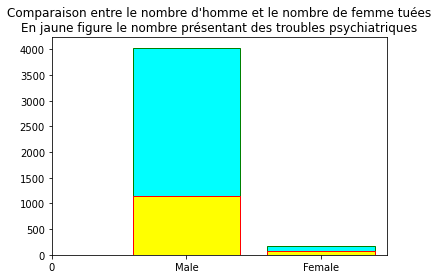

In [420]:
df1 = df[df["gender"] != 0]

df2_M = df1[df1["gender"] == "M"]
df2_F = df1[df1["gender"] == "F"]

illness_M = df2_M[df2_M["signs_of_mental_illness"] == True]
illness_F = df2_F[df2_F["signs_of_mental_illness"] == True]
illness_M = np.sum(illness_M["signs_of_mental_illness"]== True)
illness_F = np.sum(illness_F["signs_of_mental_illness"]== True)

df1 = df1.gender

gender_F = np.sum(df1=="F")
gender_M = np.sum(df1=="M")
gender_M += - illness_M
gender_F += - illness_F

x = plt.bar(1, height=gender_M, color = "cyan", edgecolor = "green")
x = plt.bar(1, height=illness_M, color = "yellow", edgecolor = "red")
x = plt.bar(2, height=gender_F, color = "cyan", edgecolor = "green")
x = plt.bar(2, height=illness_F, color = "yellow", edgecolor = "red")
x = plt.xticks(range(3),[0, "Male", "Female"])
x = plt.title("Comparaison entre le nombre d'homme et le nombre de femme tuées\nEn jaune figure le nombre présentant des troubles psychiatriques")

Ce diagramme permet de mettre en avant la faible quantité de femme tuée lors des interventions de police. Les hommes sont donc largement majoritaires en ce qui concerne leurs morts.
Il nous est aussi montré en jaune la quantité de personne ayant présenté des "signes de maladies mentales" et nous éclaire donc sur la part de personne saine d'esprit tuée.